In [1]:
!pip install keras_ocr==0.8.7
!pip install imgaug==0.2.5
!pip install matplotlib==3.3.0

In [2]:
import matplotlib.pyplot as plt
import keras_ocr

# 사전 훈련된 keras-ocr 다운로드 (가중치)
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [10]:
# 테스트 이미지
images = [
    keras_ocr.tools.read(url) for url in [
        'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg',
        'https://t1.daumcdn.net/cfile/blog/990C26485AB8E6D706'
    ]
]

ax:  AxesSubplot(0.125,0.536818;0.775x0.343182)
predictions:  [[('toodstande', array([[1329.2167 ,  199.50664],
       [1420.1775 ,  249.53513],
       [1411.6167 ,  265.10016],
       [1320.6559 ,  215.07169]], dtype=float32)), ('s', array([[1530.4688,  257.8125],
       [1546.875 ,  257.8125],
       [1546.875 ,  281.25  ],
       [1530.4688,  281.25  ]], dtype=float32)), ('somme', array([[1329.617  ,  263.08328],
       [1388.253  ,  290.85834],
       [1380.7128 ,  306.77676],
       [1322.0767 ,  279.0017 ]], dtype=float32)), ('srny', array([[1554.5955,  258.2261],
       [1636.282 ,  307.2381],
       [1618.2902,  337.2243],
       [1536.6036,  288.2123]], dtype=float32)), ('squadron', array([[1508.3682 ,  272.6082 ],
       [1668.7932 ,  360.5832 ],
       [1651.4851 ,  392.14508],
       [1491.0602 ,  304.17004]], dtype=float32)), ('ds', array([[1387.5    ,  297.65625],
       [1413.2812 ,  297.65625],
       [1413.2812 ,  316.40625],
       [1387.5    ,  316.40625]], dtype=flo

/usr/local/lib/python3.7/dist-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


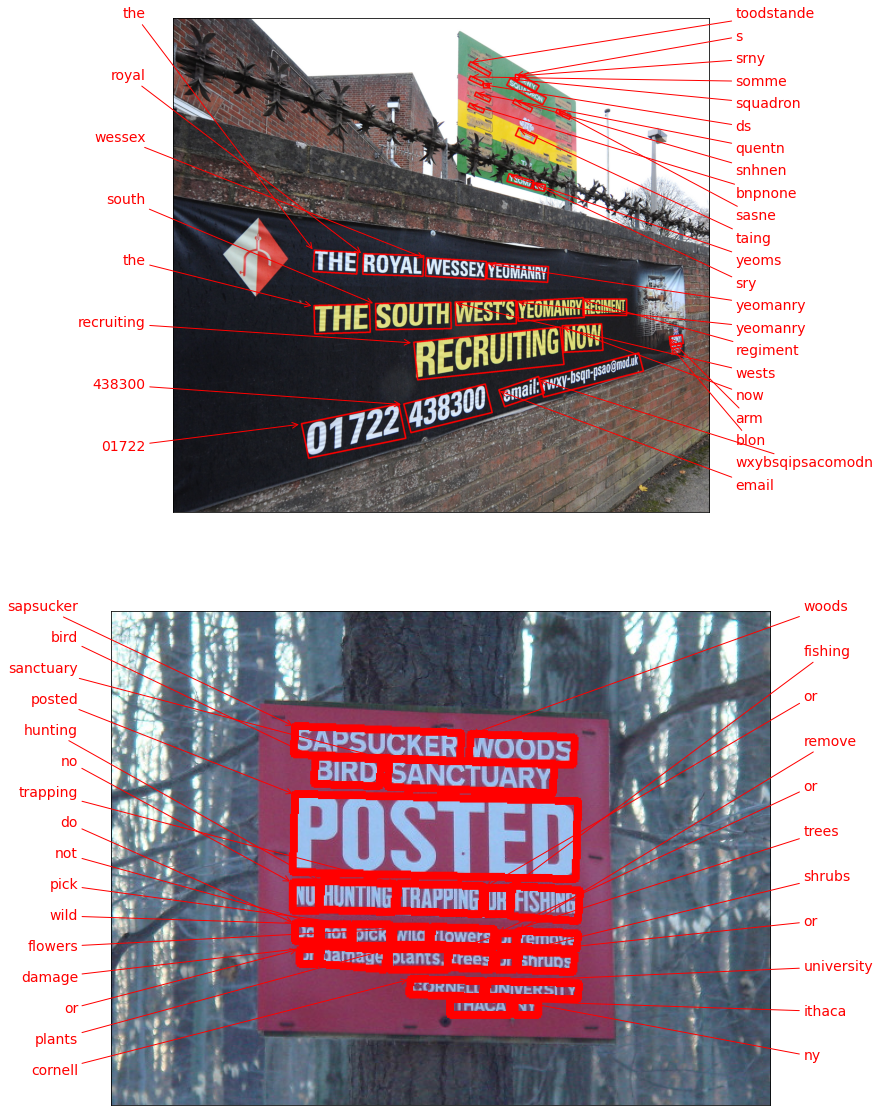

In [12]:
# prediction_groups의 예측 결과는 (단어, box) 튜플 유형을 반환함.
# (단어, 상자) 튜플.
prediction_groups = pipeline.recognize(images)

# 예측 결과 시각화
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    print("ax: ", ax)
    print("predictions: ", prediction_groups)
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)